In [3]:
import pandas as pd

In [6]:
dd=pd.read_csv("steam_data.csv")

In [6]:
dd

,id,app_id,content,author_id,is_positive
0,121802220,10,Living Legend!,76561199087455564,Positive
1,179107274,320,"Goodbye, I will miss you!",76561198076222563,Positive
2,61178970,20,pretty shit tbh for the sole reason that no on...,76561198827100890,Positive
3,177234369,620,It's genuinely so impressive how well this gam...,76561199078097482,Positive
4,166664029,440,#SAVETF2 #FIXTF2\r\n\r\nFIX TF2 VALVE,76561199514452100,Negative
...,...,...,...,...,...
2995,156638412,380,very good,76561198170052903,Positive
2996,167995189,730,trash,76561198301744490,Negative
2997,122161845,340,This is not a game! This is a tech demo from 2...,76561198443258891,Positive
2998,176573592,320,i mean its just half life 2 multiplayer pvp,76561199497078614,Positive


In [10]:
# Basic info about the dataset
print(dd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           3000 non-null   int64 
 1   app_id       3000 non-null   int64 
 2   content      2991 non-null   object
 3   author_id    3000 non-null   int64 
 4   is_positive  3000 non-null   object
dtypes: int64(3), object(2)
memory usage: 117.3+ KB
None


In [7]:
# Check for missing values
print(dd.isnull().sum())

id             0
app_id         0
content        9
author_id      0
is_positive    0
dtype: int64


In [18]:
print(dd.describe())


                 id      app_id     author_id
count  3.000000e+03  3000.00000  3.000000e+03
mean   1.219697e+08   458.96100  7.656120e+16
std    5.946852e+07   326.74423  5.511631e+08
min    3.718000e+03    10.00000  7.656120e+16
25%    7.066429e+07   240.00000  7.656120e+16
50%    1.482541e+08   440.00000  7.656120e+16
75%    1.690059e+08   620.00000  7.656120e+16
max    1.822214e+08  1930.00000  7.656120e+16


In [8]:
print(dd['is_positive'].value_counts())


is_positive
Positive    1576
Negative    1424
Name: count, dtype: int64


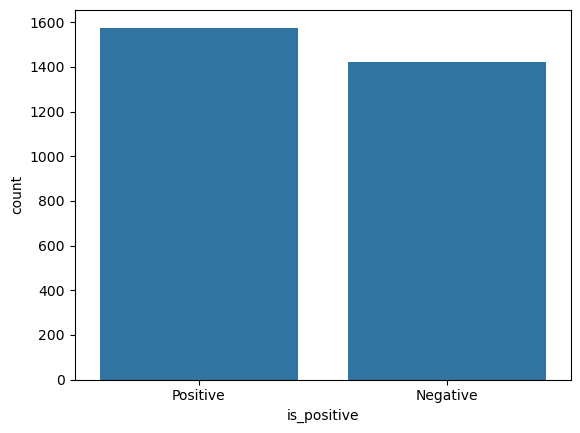

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='is_positive', data=dd)  # Replace 'label_column' with your column name
plt.show()


# Data Cleaning and Preprocessing

In [10]:
# Drop rows with missing values
df = dd.dropna()

In [31]:
print(df.isnull().sum())

id             0
app_id         0
content        0
author_id      0
is_positive    0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2991 non-null   int64 
 1   app_id       2991 non-null   int64 
 2   content      2991 non-null   object
 3   author_id    2991 non-null   int64 
 4   is_positive  2991 non-null   object
dtypes: int64(3), object(2)
memory usage: 140.2+ KB


In [12]:
# Map is_positive to 0 and 1
df['is_positive'] = df['is_positive'].map({'Positive': 1, 'Negative': 0})

C:\Users\dilip\AppData\Local\Temp\ipykernel_13920\415164415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_positive'] = df['is_positive'].map({'Positive': 1, 'Negative': 0})


In [13]:
print(df['is_positive'].value_counts())

is_positive
1    1571
0    1420
Name: count, dtype: int64


In [14]:
# Calculate text lengths (number of characters)
df['text_length'] = df['content'].apply(len)

# Summary statistics for text length
print("Text Length Summary:")
print(df['text_length'].describe())


Text Length Summary:
count    2991.000000
mean      146.429957
std       417.856045
min         1.000000
25%        16.000000
50%        40.000000
75%       113.000000
max      7759.000000
Name: text_length, dtype: float64


C:\Users\dilip\AppData\Local\Temp\ipykernel_13920\3428291298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['content'].apply(len)


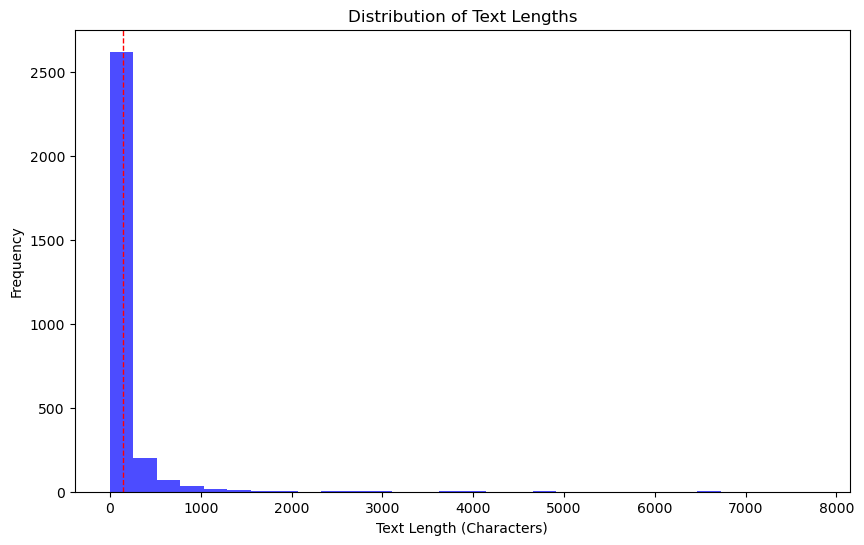

In [37]:
# Visualize the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='blue', alpha=0.7)
plt.axvline(df['text_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Identify long text outliers
outliers = df[df['text_length'] > 258.5]
print(f"Number of Outliers: {len(outliers)}")
print("Sample Outliers:\n", outliers[['content', 'text_length']].head())

Number of Outliers: 372
Sample Outliers:
                                               content  text_length
8   the games historicly accurate as donald duck s...         1197
11  The caveat of the thumbs up of this review is ...          831
12  Meh, decent, but aged like shishkebab.\nIt's f...          298
22  I replayed this the weekend before Half-Life: ...          669
24  This game. looks fine Of course I'm used to tf...          281


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [17]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    tokens = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatise
    return ' '.join(tokens)

# Apply preprocessing to content
df['cleaned_content'] = df['content'].apply(preprocess_text)


C:\Users\dilip\AppData\Local\Temp\ipykernel_13920\3477378843.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_content'] = df['content'].apply(preprocess_text)


In [19]:

# Check the results
print(df.head())

          id  app_id                                            content  \
0  121802220      10                                     Living Legend!   
1  179107274     320                          Goodbye, I will miss you!   
2   61178970      20  pretty shit tbh for the sole reason that no on...   
3  177234369     620  It's genuinely so impressive how well this gam...   
4  166664029     440              #SAVETF2 #FIXTF2\r\n\r\nFIX TF2 VALVE   

           author_id  is_positive  text_length  \
0  76561199087455564            1           14   
1  76561198076222563            1           25   
2  76561198827100890            1           93   
3  76561199078097482            1           82   
4  76561199514452100            0           33   

                                     cleaned_content  
0                                      living legend  
1                                       goodbye miss  
2  pretty shit tbh sole reason one playing bet it...  
3  genuinely impressive well

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2991 non-null   int64 
 1   app_id           2991 non-null   int64 
 2   content          2991 non-null   object
 3   author_id        2991 non-null   int64 
 4   is_positive      2991 non-null   int64 
 5   text_length      2991 non-null   int64 
 6   cleaned_content  2991 non-null   object
dtypes: int64(5), object(2)
memory usage: 186.9+ KB


In [20]:
# Drop 'content' and 'text_length' columns
df = df.drop(columns=['content', 'text_length'])

# Verify that the columns are removed
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2991 non-null   int64 
 1   app_id           2991 non-null   int64 
 2   author_id        2991 non-null   int64 
 3   is_positive      2991 non-null   int64 
 4   cleaned_content  2991 non-null   object
dtypes: int64(4), object(1)
memory usage: 140.2+ KB
None


In [21]:
from sklearn.model_selection import train_test_split

# Features (Text content)
X = df['cleaned_content']

# Labels (Target variable)
y = df['is_positive']

In [22]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL BUILDING

In [23]:
# Check the split data
print(f"Training data: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data: X_train: (2392,), y_train: (2392,)
Testing data: X_test: (599,), y_test: (599,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [77]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [79]:
# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       277
           1       0.79      0.85      0.82       322

    accuracy                           0.80       599
   macro avg       0.80      0.80      0.80       599
weighted avg       0.80      0.80      0.80       599



In [83]:
from sklearn.svm import SVC

# Train a SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       277
           1       0.79      0.85      0.82       322

    accuracy                           0.79       599
   macro avg       0.80      0.79      0.79       599
weighted avg       0.80      0.79      0.79       599



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       277
           1       0.80      0.87      0.83       322

    accuracy                           0.81       599
   macro avg       0.82      0.81      0.81       599
weighted avg       0.82      0.81      0.81       599



# DEEP LEARNING

In [156]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set parameters for the tokenizer and padding
max_vocab_size = 5000  # Maximum number of words in vocabulary
max_sequence_length = 10  # Maximum sequence length for padding

# Tokenizer to convert text to sequences of integers
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences (train and test data)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure all inputs have the same length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print("Vocabulary Size:", len(tokenizer.word_index))  # The total number of words in the vocabulary
print("Padded Sequence Example:", X_train_padded[0])   # Example of the first padded sequence

Vocabulary Size: 6639
Padded Sequence Example: [   4    2  805  249   15 2866  207    0    0    0]


In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=16, input_length=max_sequence_length),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Another dropout layer
    Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\dilip\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [182]:
# Train the model
history = model.fit(
    X_train_padded, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=50,  # Number of training epochs
    batch_size=16,  # Batch size for gradient updates
    verbose=1  # Show training progress
)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5289 - loss: 0.6918 - val_accuracy: 0.6367 - val_loss: 0.6461
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7593 - loss: 0.5056 - val_accuracy: 0.7349 - val_loss: 0.5159
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8769 - loss: 0.3055 - val_accuracy: 0.7453 - val_loss: 0.5514
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9129 - loss: 0.2081 - val_accuracy: 0.7411 - val_loss: 0.6102
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1666 - val_accuracy: 0.7432 - val_loss: 0.6790
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9503 - loss: 0.1334 - val_accuracy: 0.7182 - val_loss: 0.8712
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9599 - loss: 0.1168 - val_accuracy: 0.7098 - val_loss: 1.0349
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9564 - loss: 0.1099 - val_accuracy: 

In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Predict the test set labels
y_pred_prob = model.predict(X_test_padded)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Convert y_test to integers for comparison
y_test = y_test.astype("int32")



# Display the classification report
print(classification_report(y_test, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       277
           1       0.72      0.80      0.76       322

    accuracy                           0.73       599
   macro avg       0.73      0.72      0.72       599
weighted avg       0.73      0.73      0.72       599



In [27]:
import pickle

# Save the trained model and TF-IDF vectorizer using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [31]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [30]:
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


# TRANSFORMER MODEL BERT
